In [1]:
# import system libraries
import numpy as np
import matplotlib.pyplot as plt### virtual fish swims with 0.12 m  circle without background
import pickle
%matplotlib inline

In [2]:
"""
Read saved data
"""
ReadData = True
if ReadData:
    filename = '../Data/fish/2VF_Bifurcation_data'
    LRDs  = np.arange(0.01,0.12,0.005)  # Left Right Distance
    infile = open(filename,'rb')
    new_dict = pickle.load(infile)
    Results = new_dict['Results']
    Xs = new_dict['Xs']
    Ys = new_dict['Ys']
    infile.close()

In [4]:
ReadData = True

    
"""
Read saved data
"""
if ReadData:
    LRDs3   = np.arange(0.005,0.101,0.005)
    filename = '../Data/fish/3VF_Trifurcation_data'
    infile = open(filename,'rb')
    new_dict = pickle.load(infile)
    Results3 = new_dict['Results']
#     PeakPositionx = new_dict['PeakPositionx']
#     PeakPositiony = new_dict['PeakPositiony']
    Xs3 = new_dict['Xs']
    Ys3 = new_dict['Ys']
    infile.close()
#     print(new_dict)

(50, 50, 22)


/home/liang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: 
The get_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.get_clim instead.


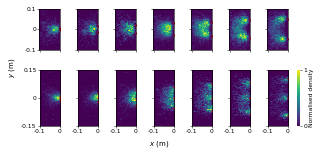

In [7]:

print(np.shape(Results))

heights = [2.2,3]

# gs_kw = dict(width_ratios=widths, height_ratios=heights)
gs_kw = dict(height_ratios=heights)

fig,axs = plt.subplots(nrows=2,ncols=7,sharex=False,sharey='row',figsize=(11.4/2.45,5/2.45),gridspec_kw=gs_kw)
plt.setp(axs.flat, aspect=1.0, adjustable='box')


for ia, ax in enumerate(axs[0]):
    
    hm = ax.imshow(Results[:,:25,ia*3]/np.max(Results[:,:25,ia*3].T),origin='lower',rasterized=True,vmin=0,vmax=1)
    
    ax.set_yticks([0,25,49])
    ax.set_yticklabels(['-0.1','0','0.1'])
    
    ax.set_xticks([0,24])
    ax.set_xticklabels(['',''])
    
    
    ax.plot([24,24],25-np.array([-0.5*LRDs[ia*3],0.5*LRDs[ia*3]])*25/0.1,'.',c='r',ms=2)
    

    
for ia, ax in enumerate(axs[1]):
    
    hm = ax.imshow(Results3[:,13:49,ia*3,0]/np.max(Results3[:,13:49,ia*3,0].T),origin='lower',rasterized=True,vmin=0,vmax=1)
    
    ax.set_yticks([0,49,99])
    ax.set_yticklabels(['-0.15','0','0.15'])
    
    ax.set_xticks([0,35])
    ax.set_xticklabels(['-0.1','0'])
    
    
    ax.plot([35,35,35],50-np.array([-1*LRDs[ia*3],0,1*LRDs[ia*3]])*50/0.15,'.',c='r',ms=2)
    
    
    
    
    
fig.subplots_adjust(bottom=0.1, right=0.9, top=0.9, hspace=0.4)
height = axs[-1][-1].get_position().height
y0 = axs[-1][-1].get_position().p0[1]
cax = fig.add_axes([0.91, y0, 0.01, 1*height])
hc = fig.colorbar(hm,cax=cax,label='Normalised density')
hc.ax.artists.remove(hc.outline)
ylim = hc.get_clim()
hc.set_ticks(ylim)
hc.outline.set_visible(False)
hc.set_ticks([0,1])
hc.set_ticklabels(['0','1'])
hc.ax.set_ylabel('Normalised density',labelpad=2)
fig.text(0.5,-0.02, r'$x$ (m)', ha="center", va="center",fontsize = 7)
fig.text(0.06,0.5, r'$y$ (m)', ha="center", va="center", rotation=90,fontsize = 7)  
plt.show()